In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras

# 1-Chargement des données


In [20]:
# Chargement de fichier CSV (DataFrame)
donnees = pd.read_csv('C:\\Users\\minou\\OneDrive\\Bureau\\S4\\AI\\Projet\\Hep_C.csv')

# 2-Exploration des données

In [21]:
# on utilise donnees.head() pour obtenir un aperçu rapide des premières lignes de DataFrame
donnees.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,Blood Donor
1,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,Blood Donor
2,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,Blood Donor
3,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,Blood Donor
4,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,Blood Donor


In [22]:
# tail() est similaire au haid() mais elle affiche les dernières lignes du DataFrame
donnees.tail()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
610,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,Cirrhosis
611,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,Cirrhosis
612,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,Cirrhosis
613,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,Cirrhosis
614,59,f,36.0,NaN,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0,Cirrhosis


In [23]:
# donnees.info() affiche le nombre de lignes de colonnes et les types de données
donnees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       615 non-null    int64  
 1   Sex       615 non-null    object 
 2   ALB       614 non-null    float64
 3   ALP       597 non-null    float64
 4   ALT       614 non-null    float64
 5   AST       615 non-null    float64
 6   BIL       615 non-null    float64
 7   CHE       615 non-null    float64
 8   CHOL      605 non-null    float64
 9   CREA      615 non-null    float64
 10  GGT       615 non-null    float64
 11  PROT      614 non-null    float64
 12  Category  615 non-null    object 
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


In [24]:
# ici on a compter les occurrences de chaque valeur de la colonne Category et Sex
donnees['Category'].value_counts()

Category
Blood Donor            533
Cirrhosis               30
Hepatitis               24
Fibrosis                21
suspect Blood Donor      7
Name: count, dtype: int64

In [25]:
donnees['Sex'].value_counts()

Sex
m    377
f    238
Name: count, dtype: int64

In [26]:
# describe() est utilisée pour obtenir des statistiques descriptives sur les données de notre DataFrame
donnees.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


# 3-Interprétation des resultats

##### - On constate que le nombre d'hommes est supérieur à celui des femmes de 22.5%.
##### - On observe que la catégorie 'Blood Donor' représente la majorité des observations avec 533 individus, tandis que le 'Suspect Blood Donor' représente un faible pourcentage. En ce qui concerne les catégories 'Cirrhosis', 'Hepatitis' et 'Fibrosis', elles ont des valeurs autour de 25.
##### - L'âge moyen des individus est d'environ 47 ans.- 

# 4-Visualisation des données

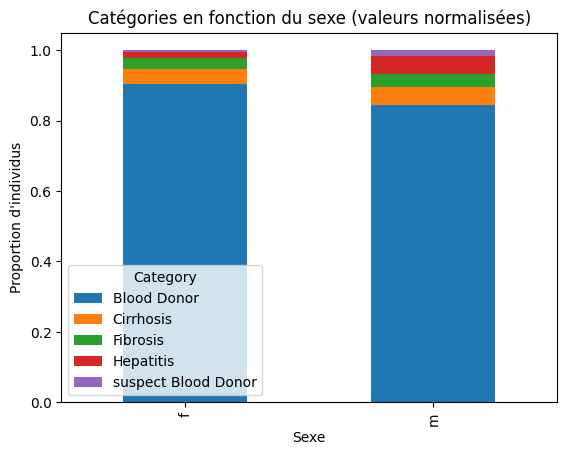

In [27]:
import matplotlib.pyplot as plt

# On Groupe les données par sexe et catégorie puis on compte le nombre d'individus dans chaque groupe
counts = donnees.groupby(['Sex', 'Category']).size().unstack()
# pour mieux interpreter les resultats on a normaliser les valeurs car l'effectif des hommes et plus grands que les femmes)
# Normaliser les valeurs pour chaque catégorie (ici on divise chaque valeur de la catégorie par 
# la somme totale des valeurs de cette catégorie.)
counts_normalisé = counts.div(counts.sum(axis=1), axis=0)

# Création d'un diagramme en barres empilées avec les valeurs normalisées
counts_normalisé.plot(kind='bar', stacked=True)

# Ajouter des titres et des libellés
plt.title('Catégories en fonction du sexe (valeurs normalisées)')
plt.xlabel('Sexe')
plt.ylabel('Proportion d\'individus')

plt.show()


#### Interprétation de diagramme : 
##### on constate que les femmes ont la catégorie "Blood Donor" plus que les hommes et pour les catégories 
##### "suspect Blood Donor" et "Hepatits" les hommes ont des valeurs plus au moins elevés que les femmes

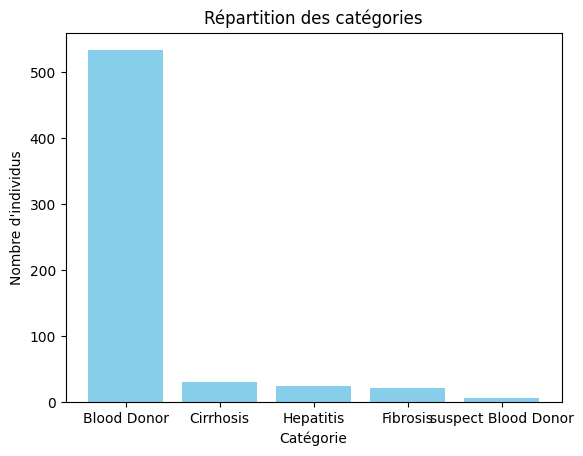

In [28]:
# le nombre d'occurrences de chaque catégorie
category_counts = donnees['Category'].value_counts()

# le diagramme à barres
plt.bar(category_counts.index, category_counts.values, color='skyblue')

# le titre de diagramme et les axes x et y
plt.title('Répartition des catégories')
plt.xlabel('Catégorie')
plt.ylabel('Nombre d\'individus')


plt.show()


#### Interprétation de Diagramme : 
##### On observe que la catégorie 'Blood Donor' représente la majorité des observations avec plus de 500 individus, tandis que le 'Suspect Blood Donor' représente un faible pourcentage. En ce qui concerne les catégories 'Cirrhosis', 'Hepatitis' et 'Fibrosis', elles ont des valeurs autour de 25lt.show()


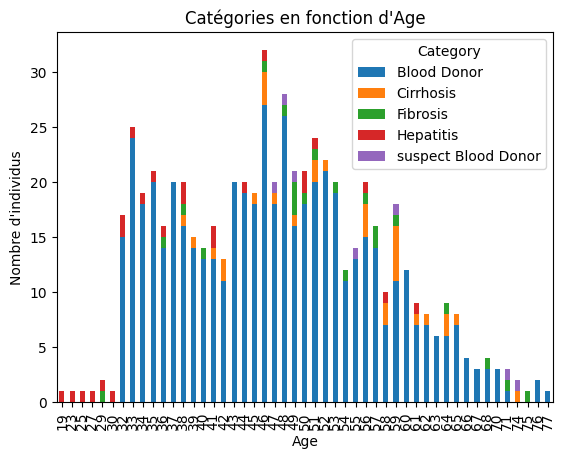

In [29]:
age = donnees['Age']
categorie = donnees['Category']

# on va compter le nombre d'individus de chaque catégorie pour chaque sexe
counts = donnees.groupby(['Age', 'Category']).size().unstack()

# diagramme en barres empilées
counts.plot(kind='bar', stacked=True)

# le titre de diagramme et les axes x et y
plt.title('Catégories en fonction d\'Age')
plt.xlabel('Age')
plt.ylabel('Nombre d\'individus')

plt.show()

#### Interprétation de diagramme :
##### d'après le diagamme on constate que la tranche d'age entre 19-30 se caractérise par 'Hepatitis' et d'aprés l'age 47 on constate la présence de la catégorie 'suspect Blood Donor'.

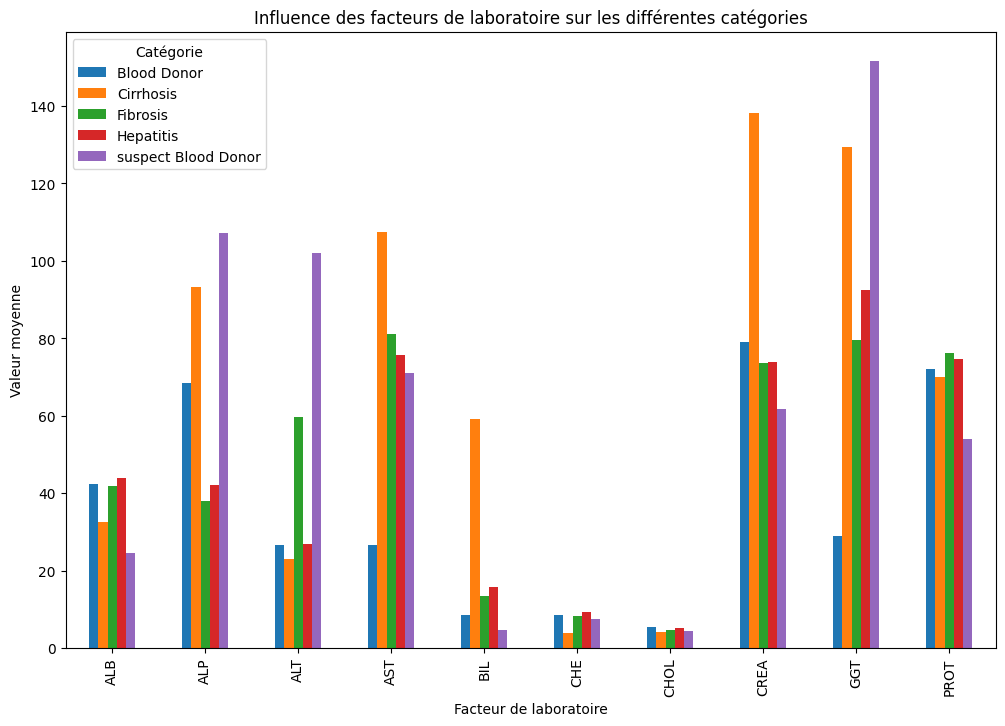

In [30]:
# On calcule la moyenne des valeurs de chaque facteur de laboratoire pour chaque catégorie
lab_facteur_moyen = donnees.groupby('Category')[['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].mean()

# On fait la transposer les données pour faciliter le tracé 
# (pour mettre les valeurs moyennes en tant que colonnes et les facteurs de laboratoire en tant que lignes)
lab_facteur_moyen = lab_facteur_moyen.T

# diagramme en barres groupées pour chaque catégorie
lab_facteur_moyen.plot(kind='bar', figsize=(12, 8))

# le titre de diagramme et les axes x et y
plt.title('Influence des facteurs de laboratoire sur les différentes catégories')
plt.xlabel('Facteur de laboratoire')
plt.ylabel('Valeur moyenne')
plt.legend(title='Catégorie')


plt.show()


#### Interprétation de diagramme :
##### Pour la catégorie Cirrhosis on constate que les enzymes AST, CREA et GGT atteint des valeurs inportants donc on peut conclure  que ces l'augmentations de ces enzymes sont responsables de la Cirrhosis de meme pour le 'suspect Blood Donor' est controlé par les enzymes ALP, ALT et GGT.

# 6-Nettoyage des données

##### J'ai commencé par tracer un diagramme pour avoir une idée des colonnes contenant des valeurs nulles et du nombre de valeurs nulles pour chaque colonne.

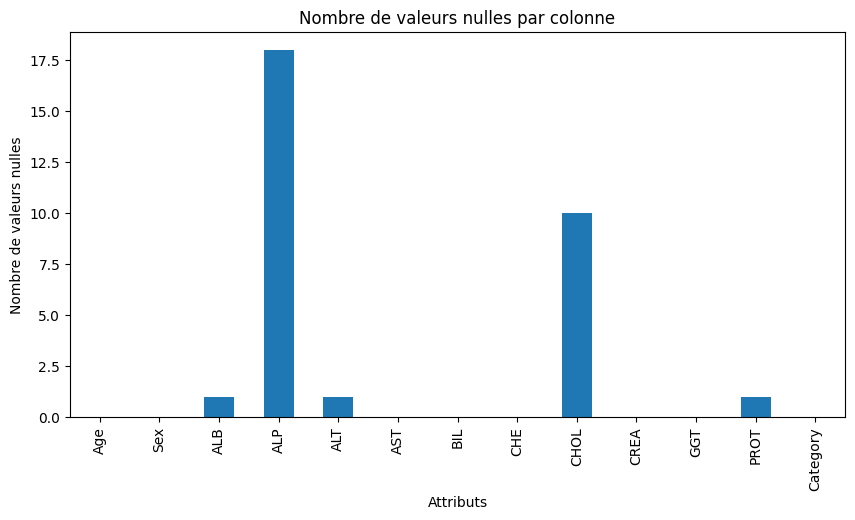

In [31]:
plt.figure(figsize=(10, 5))
# Tracage d'un graphe à barres montrant le nombre de valeurs nulles par colonne
donnees.isnull().sum().plot(kind='bar')
# titre du graphe
plt.title('Nombre de valeurs nulles par colonne')
# Ajout des étiquettes de l'axe x et de l'axe y
plt.xlabel('Attributs')
plt.ylabel('Nombre de valeurs nulles')
plt.show()


##### Pour la phase de Nettoyage des données
###### Si les valeurs nulles sont excessives dans une colonne, une option est de supprimer la colonne entière. De même, si un enregistrement contient plusieurs valeurs nulles, il est possible de supprimer toute la ligne correspondante. Cependant, dans la plupart des cas, la méthode la plus courante consiste à remplacer les valeurs manquantes par zéro, la moyenne ou la médiane des valeurs existantes dans la même colonne.

In [32]:
# on a remplit les valeurs nulles dans le DataFrame en utilisant la moyenne de chaque colonne,
# en excluant les colonnes non numériques lors du calcul de la moyenne (Age, Category).
donnees = donnees.fillna(donnees.mean(numeric_only=True))


# 7-Traitement des données catégorielles ou symboliques


##### On va utiliser L'encodage one-hot pour la colonne 'category' qui consiste à représenter chaque catégorie unique d'une variable catégorielle par une variable binaire distincte, où chaque variable binaire indique la présence ou l'absence de la catégorie dans un échantillon donné.

In [33]:
# on Crée une instance de OneHotEncoder
onehot_encoder = OneHotEncoder()
# on extrait la colonne category
donnees_category = donnees[['Category']]
# on transforme les données avec OneHotEncoder
donnees_encodées = onehot_encoder.fit_transform(donnees_category)
donnees = pd.concat([donnees, pd.DataFrame(donnees_encodées.toarray())], axis=1)  # Concaténer les données encodées
donnees_encodées.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

##### pour la colonne sexe on va utiliser une transformation binaire où par exemple 'm' est encodé en 0 et 'f' est encodé en 1.

In [34]:
# on va utiliser  la fonction map pour transformer 'm' en 0 et 'f' en 1
donnees['Sex'] = donnees['Sex'].map({'m': 0, 'f': 1})
# l'affichage des données aprés transformation
print(donnees)


     Age  Sex   ALB        ALP    ALT    AST   BIL    CHE  CHOL   CREA    GGT  \
0     32    0  38.5   52.50000    7.7   22.1   7.5   6.93  3.23  106.0   12.1   
1     32    0  38.5   70.30000   18.0   24.7   3.9  11.17  4.80   74.0   15.6   
2     32    0  46.9   74.70000   36.2   52.6   6.1   8.84  5.20   86.0   33.2   
3     32    0  43.2   52.00000   30.6   22.6  18.9   7.33  4.74   80.0   33.8   
4     32    0  39.2   74.10000   32.6   24.8   9.6   9.15  4.32   76.0   29.9   
..   ...  ...   ...        ...    ...    ...   ...    ...   ...    ...    ...   
610   62    1  32.0  416.60000    5.9  110.3  50.0   5.57  6.30   55.7  650.9   
611   64    1  24.0  102.80000    2.9   44.4  20.0   1.54  3.02   63.0   35.9   
612   64    1  29.0   87.30000    3.5   99.0  48.0   1.66  3.63   66.7   64.2   
613   46    1  33.0   68.28392   39.0   62.0  20.0   3.56  4.20   52.0   50.0   
614   59    1  36.0   68.28392  100.0   80.0  12.0   9.07  5.30   67.0   34.0   

     PROT     Category    0

# 8-Séparation des données en un ensemble d'entrainement et de test

In [51]:
X = donnees.drop('Category', axis=1)  # Caractéristiques (toutes les colonnes sauf 'Category')
y = donnees['Category']  # Variable cible ('Category')

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
X_train
y_train

83     Blood Donor
90     Blood Donor
228    Blood Donor
509    Blood Donor
329    Blood Donor
          ...     
71     Blood Donor
106    Blood Donor
270    Blood Donor
435    Blood Donor
102    Blood Donor
Name: Category, Length: 492, dtype: object

# 9-Arbre de décision 

In [54]:
# On crée une instance de DecisionTreeClassifier
tree_clf = tree.DecisionTreeClassifier(max_depth = 2, criterion = "entropy")
X_train.columns = X_train.columns.astype(str)
# l'entraînement de modèle 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

# 10-Visualiser l'arbre

[Text(0.6, 0.8333333333333334, 'x[12] <= 0.5\nentropy = 0.71\nsamples = 492\nvalue = [437, 21, 15, 15, 4]'),
 Text(0.4, 0.5, 'x[13] <= 0.5\nentropy = 1.828\nsamples = 55\nvalue = [0.0, 21.0, 15.0, 15.0, 4.0]'),
 Text(0.2, 0.16666666666666666, 'entropy = 1.405\nsamples = 34\nvalue = [0, 0, 15, 15, 4]'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.0\nsamples = 21\nvalue = [0, 21, 0, 0, 0]'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 437\nvalue = [437, 0, 0, 0, 0]')]

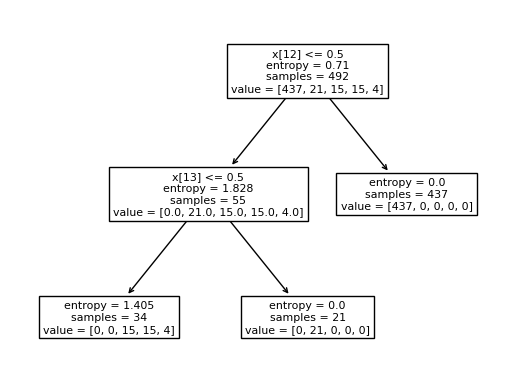

In [55]:
tree.plot_tree(tree_clf)

# 11-Prédiction sur l'ensemble de Test

In [65]:
# Prédire l'ensemble de test
X_test.columns = X_test.columns.astype(str)
y_pred = tree_clf.predict(X_test)
# Comparaison entre la Prédiction et le résultat réel sur l'ensemble de test
for prediction, actual in zip(y_pred, y_test):
    print("Prédiction:", prediction, "| Réel:", actual)


Prédiction: Blood Donor | Réel: Blood Donor
Prédiction: Blood Donor | Réel: Blood Donor
Prédiction: Blood Donor | Réel: Blood Donor
Prédiction: Cirrhosis | Réel: Cirrhosis
Prédiction: Blood Donor | Réel: Blood Donor
Prédiction: Cirrhosis | Réel: Cirrhosis
Prédiction: Blood Donor | Réel: Blood Donor
Prédiction: Blood Donor | Réel: Blood Donor
Prédiction: Blood Donor | Réel: Blood Donor
Prédiction: Blood Donor | Réel: Blood Donor
Prédiction: Blood Donor | Réel: Blood Donor
Prédiction: Blood Donor | Réel: Blood Donor
Prédiction: Blood Donor | Réel: Blood Donor
Prédiction: Blood Donor | Réel: Blood Donor
Prédiction: Blood Donor | Réel: Blood Donor
Prédiction: Blood Donor | Réel: Blood Donor
Prédiction: Blood Donor | Réel: Blood Donor
Prédiction: Blood Donor | Réel: Blood Donor
Prédiction: Blood Donor | Réel: Blood Donor
Prédiction: Fibrosis | Réel: Hepatitis
Prédiction: Blood Donor | Réel: Blood Donor
Prédiction: Blood Donor | Réel: Blood Donor
Prédiction: Cirrhosis | Réel: Cirrhosis
Prédi

# 12-Accuracy de modele

In [71]:
# la précision du modele
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9024390243902439

# 13-La validation croisée

In [89]:
# la validation croisée
scores = cross_val_score(tree_clf, X_train, y_train, cv=4)  # cv = nombre de plis
# l'affichage des scores
print("Scores de validation croisée:", scores)
# la moyenne des scores
mean_score = scores.mean()
print("Moyenne des scores de validation croisée:", mean_score)

Scores de validation croisée: [1.         1.         0.98373984 1.        ]
Moyenne des scores de validation croisée: 0.9959349593495935


# 14-les meilleurs paramètres pour le modèle

##### pour extraire les meilleurs parametres de modele on va utiliser GridSearchCV qui recherche les meilleures combinaisons d'hyperparamètres en testant chaque combinaison à l'aide de la validation croisée. Il sélectionne ensuite les hyperparamètres offrant les meilleures performances pour le modèle.

In [84]:
# On definit les hyperparamètres à tester
param_grid = {
    'max_depth': [2, 3, 10], # la profondeur maximale de l'arbre de décision
    'min_samples_split': [2, 5, 10], # le nombre minimum d'échantillons requis pour diviser un nœud interne de l'arbre
    'min_samples_leaf': [1, 2, 4] # le nombre minimum d'échantillons requis pour être au niveau d'une feuille 
}

# On Crée l'instance de modèle
tree_clf = DecisionTreeClassifier()

# Recherche des meilleurs paramètres en utilisant GridSearchCV
grid_search = GridSearchCV(tree_clf, param_grid, cv=4, scoring='accuracy')
grid_search.fit(X_train, y_train)

# l'affichage des meilleurs paramètres 
print("Meilleurs paramètres :", grid_search.best_params_)

# On utilise le meilleur modèle trouvé pour prédire sur l'ensemble de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# l'affichage de l'accuracy sur l'ensemble de test
accuracy = accuracy_score(y_test, y_pred)
print("Précision sur l'ensemble de test :", accuracy)

Meilleurs paramètres : {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Précision sur l'ensemble de test : 0.991869918699187


# 15-Conclusion

# 16-l'Algorithme de Random Forest

In [88]:
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# l'entraînement de modèle sur l'ensemble 
rf_clf.fit(X_train, y_train)

Précision sur l'ensemble de test : 0.991869918699187


# 17- Prédiction sur l'ensemble de Test


In [ ]:
# Prédiction des étiquettes de l'ensemble de test
y_pred = model.predict(X_test)

# 18-Précision de modèle

In [90]:
# on calcule l'accuracy de modéle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle sur l'ensemble de test :", accuracy)

Précision du modèle sur l'ensemble de test : 0.991869918699187


# 19-Comparaison des deux modéles

##### Lorsque on a utilisé l'arbre de décision, nous avons obtenu une précision de 0.9024390243902439 sur l'ensemble de test. Cependant, lorsque on a utilisé le Random Forest, on a obtenu un résultat de 0.991869918699187. Cela est dû au fait que le Random Forest est un ensemble d'arbres de décision, ce qui lui permet de capturer des relations plus complexes dans les données par rapport à un seul arbre de décision.

# 20-Les importances des attributs

In [94]:

importances = rf_clf.feature_importances_

# Maintenant, vous pouvez associer ces importances à leurs noms d'attributs correspondants
colonnes = X.columns  # Supposons que X contient vos données avec les noms d'attributs appropriés

# Afficher les importances des attributs
for name, importance in zip(colonnes, importances):
    print(f"{name}: {importance}")

Age: 0.01697225777477743
Sex: 0.001291540662210644
ALB: 0.03779367379122478
ALP: 0.021884171507902166
ALT: 0.026499959080651062
AST: 0.10141309828748338
BIL: 0.02380138589594057
CHE: 0.04275828925312899
CHOL: 0.014223808741060556
CREA: 0.009219962855613705
GGT: 0.016872488320376217
PROT: 0.015536469785316736
0: 0.3289738980414491
1: 0.12690452222223572
2: 0.09682298831051148
3: 0.10607415950388728
4: 0.012957325966230239


# 21-Séparation des données d’entrainement en un ensemble de validation et un ensemble d’entrainement

In [97]:
# On divise l'ensemble d'entrainement en ensembles d'entrainement et de validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 22-Réseau de Neurones

In [116]:
"""
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Définir input_shape en fonction des caractéristiques de vos données d'entrée
input_shape = (5,)  # Par exemple, si vos données ont 10 caractéristiques

# Créer un modèle séquentiel
model = Sequential([
    Dense(64, activation='relu', input_shape=input_shape),
    Dense(10, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

# Évaluer le modèle
test_loss, test_acc = model.evaluate(X_test, y_test)
"""

Epoch 1/10


C:\ProgramData\anaconda3\envs\New_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_5" is incompatible with the layer: expected axis -1 of input shape to have value 5, but received input with shape (None, 17)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 17), dtype=float32)
  • training=True
  • mask=None